In [1]:
import numpy as np
import global_variables as gv
import derivative_gundlach as der
import geometry
import energy_momentum as tmunu
import variable_change as variables
import utilities
import rhs
import initial_data
from scipy.integrate import ode
import pylab as pl
import evolve

%matplotlib inline

Version 7.000


In [5]:
r0=0.
rf=1.
resolutions = [20,40,80]

In [78]:
def get_f_even(r):
    return r**2
def get_div_f_even(r):
    return 4*r
def get_f_odd(r):
    return r**5
def get_div_f_odd(r):
    return 7*(r**4)

In [79]:
def make_r(resolution):
    r = np.linspace(r0,rf,resolution)
    dr = r[1]-r[0]
    if der.STAGGERED:
        r += 0.5*dr
    return r

In [95]:
f_evens=[None for res in resolutions]
f_odds=[None for res in resolutions]
df_evens = [None for res in resolutions]
df_odds = [None for res in resolutions]
df_evens_meas = [None for res in resolutions]
df_odds_meas = [None for res in resolutions]
df_evens_res = [None for res in resolutions]
df_odds_res = [None for res in resolutions]
rs = [None for res in resolutions]
for i,res in enumerate(resolutions):
    r = make_r(res)
    rs[i]=r
    f_evens[i] = get_f_even(r)
    f_odds[i] = get_f_odd(r)
    df_odds[i] = get_div_f_odd(r)
    df_evens[i] = get_div_f_even(r)
    df_evens_meas[i] = der.div(f_evens[i],r,der.EVEN)
    df_odds_meas[i] = der.div(f_odds[i],r,der.ODD)
    df_evens_res[i] = (df_evens_meas[i] - df_evens[i])*(res**(der.order))
    df_odds_res[i] = (df_odds_meas[i] - df_odds[i])*(res**(der.order))

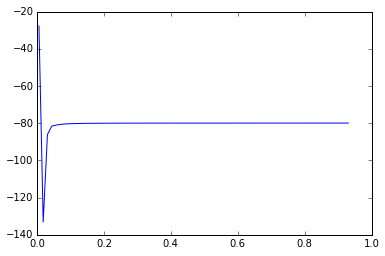

In [96]:
i=-1
pl.plot(rs[i][:-6],df_odds_res[i][:-6])

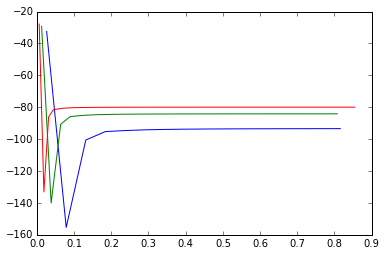

In [97]:
for i in range(len(resolutions)):
    pl.plot(rs[i][:-4*(i+1)],df_odds_res[i][:-4*(i+1)])

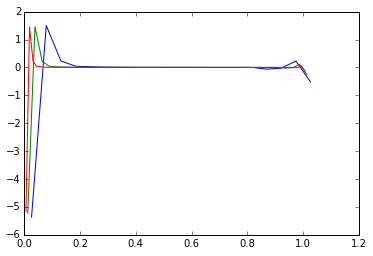

In [55]:
for i in range(len(resolutions)):
    pl.plot(rs[i],df_evens_res[i])

In [56]:
print der.u1,

2.71556313896


In [57]:
print der.v

[ -7.25080880e-01   1.87083034e+00   6.49064104e+00 ...,   8.98500625e+06
   8.99100225e+06   8.99700025e+06]
